# Student Performance Dataset (kaggle)

- 학생성취도자료는중학교수학과정설문조사에서입수한자료
- 성별, 나이, 가족의 크기, 아버지 교육, 어머니 교육, 아버지와 어머니의 직업, 가족 관계, 건강 및 등급


## 얻고자 하는 인사이트
- 학생의 성취도와 연관이 있는 요인은 무엇인가?
- 학생의 점수를 높이기 위한 좋은 방법은 무엇인가?

##### 출처 : https://www.kaggle.com/ (kaggle)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')

In [2]:
# 한글폰트 설정
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
# 선명하게 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\user\AppData\Local\Temp\ipykernel_1240\2863771375.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [3]:
df = pd.read_csv("data/StudentsPerformance.csv", encoding='utf-8')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# 결측치 확인
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


### 데이터 컬럼 확인하기
- race/ethnicity : groupA, group B, group C, group D
- parental level of education : bachelor's degree(학사 학위), some college(대학), master's degree(석사학위), associate's degree(준학사 학위), high school(고등학교), some high school(고등학교)
- lunch : standard(표준), free/reduced(자유)
- test preparation course(시험준비과정) : none(없음), completed(완료된)

In [7]:
# 데이터 확인하기
print("race/ethnicity : ",df['race/ethnicity'].unique())
print("\nparental level of education : ",df['parental level of education'].unique())
print("\nlunch : ",df['lunch'].unique())
print("\ntest preparation course : ",df['test preparation course'].unique())

race/ethnicity :  ['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch :  ['standard' 'free/reduced']

test preparation course :  ['none' 'completed']


In [8]:
# 부모의 학위에 따라 학생의 성적 비교하기
df_parental_level = df[['parental level of education', 'math score', 'reading score', 'writing score']]
df_parental_level

,parental level of education,math score,reading score,writing score
0,bachelor's degree,72,72,74
1,some college,69,90,88
2,master's degree,90,95,93
3,associate's degree,47,57,44
4,some college,76,78,75
...,...,...,...,...
995,master's degree,88,99,95
996,high school,62,55,55
997,high school,59,71,65
998,some college,68,78,77


<Figure size 1080x576 with 0 Axes>

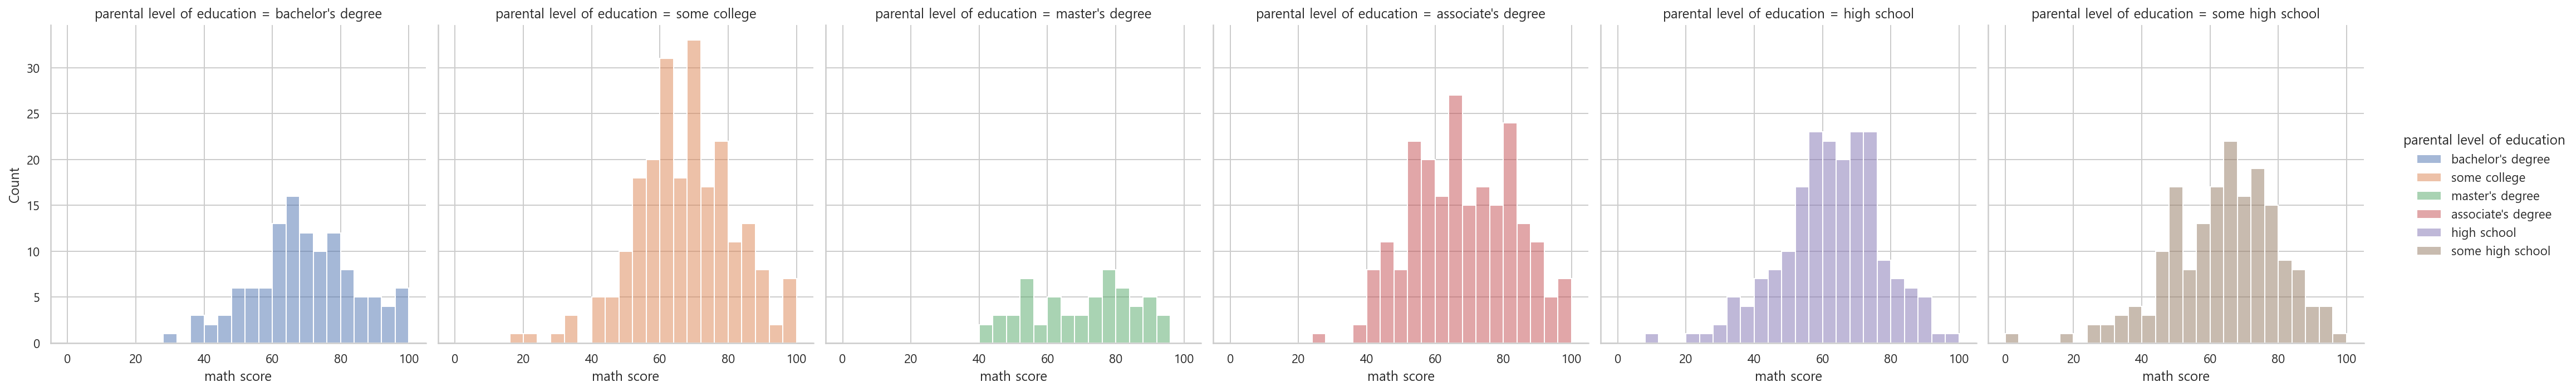

In [9]:
plt.figure(figsize=(15,8))
sns.displot(data=df_parental_level, x="math score", hue="parental level of education", col='parental level of education')

# master's degree는 다른 그래프들 보다 분포가 좁다.

<Figure size 1080x576 with 0 Axes>

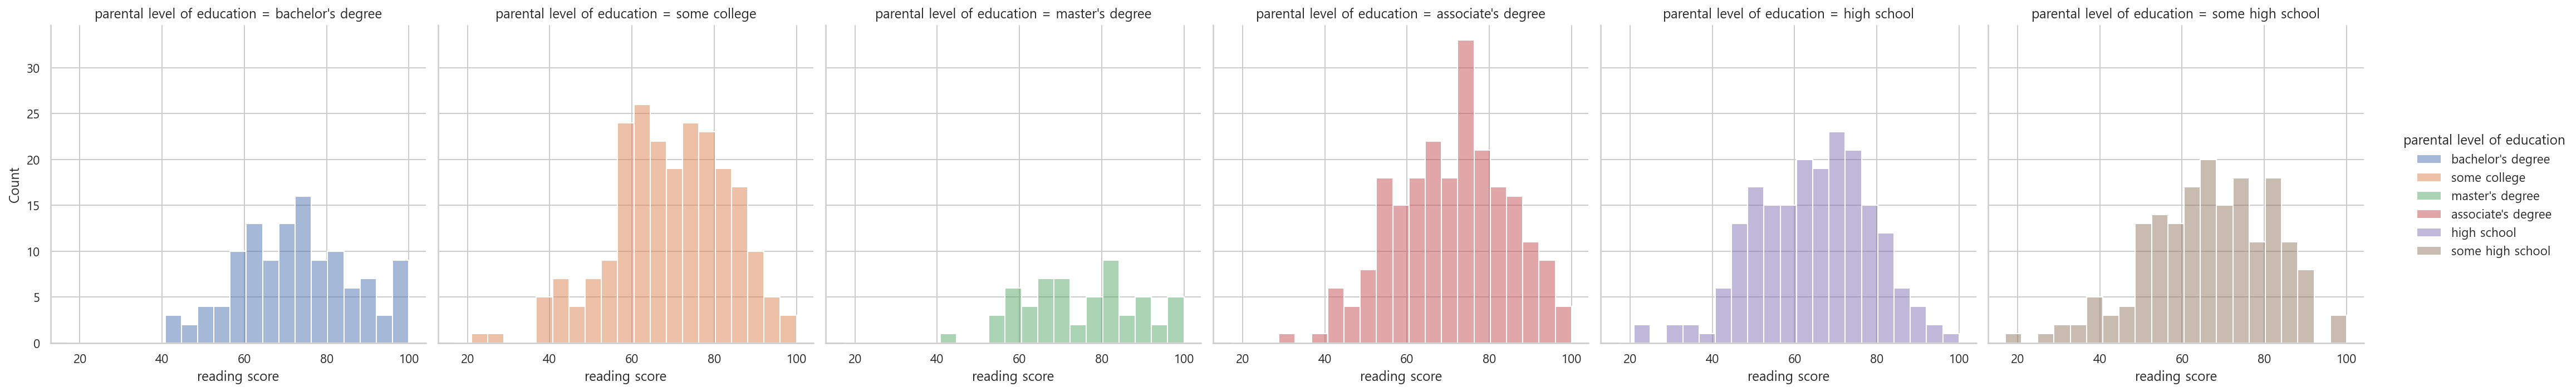

In [10]:
plt.figure(figsize=(15,8))
sns.displot(data=df_parental_level, x="reading score", hue="parental level of education", col='parental level of education')

# master's degree는 다른 그래프들 보다 분포가 좁다.

<Figure size 1080x576 with 0 Axes>

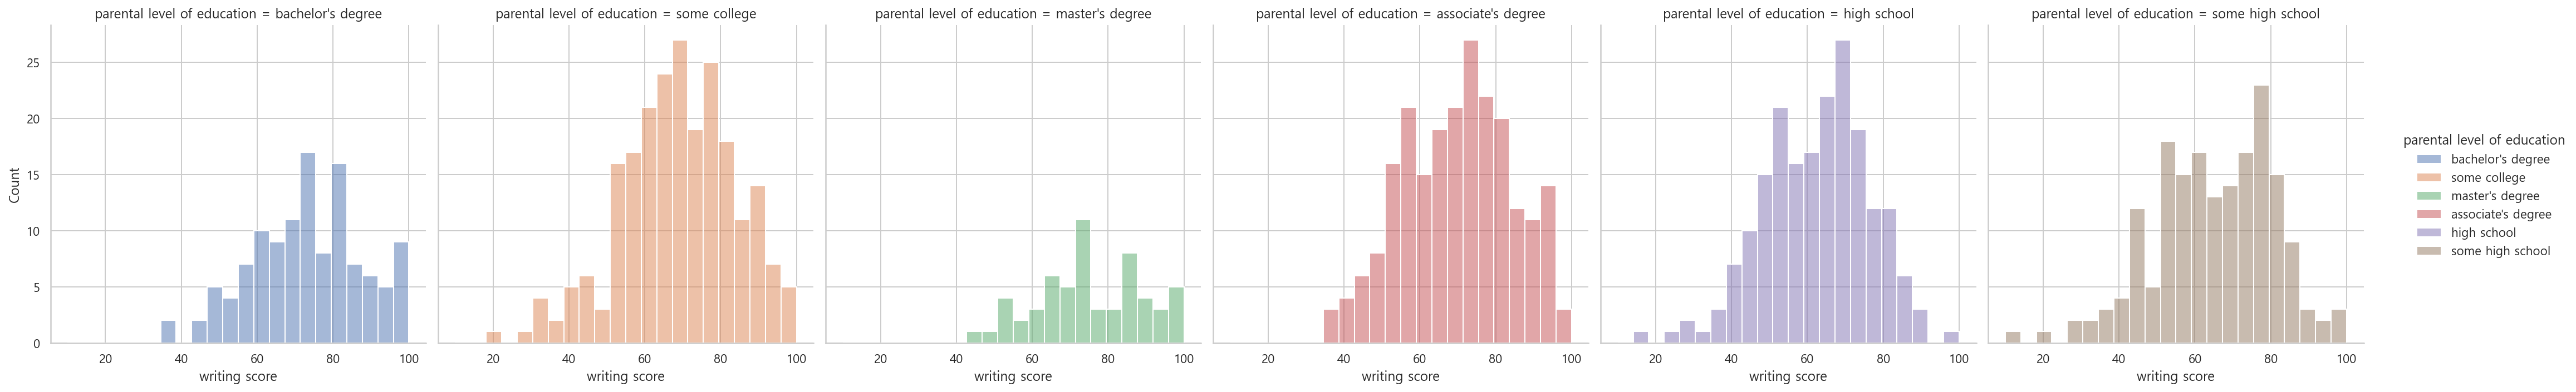

In [11]:
plt.figure(figsize=(15,8))
sns.displot(data=df_parental_level, x="writing score", hue="parental level of education", col='parental level of education')

# master's degree는 다른 그래프들 보다 분포가 좁다.

#### 읽기를 잘하면 쓰기를 잘하는지 알아보기 위한 그래프
- 대체적으로 읽기점수가 높은 학생은 쓰기 점수도 높다는 것을 알 수 있다.
- or 평균적으로 특정과목의 점수가 높은 학생은 다른 과목도 점수가 높다.

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

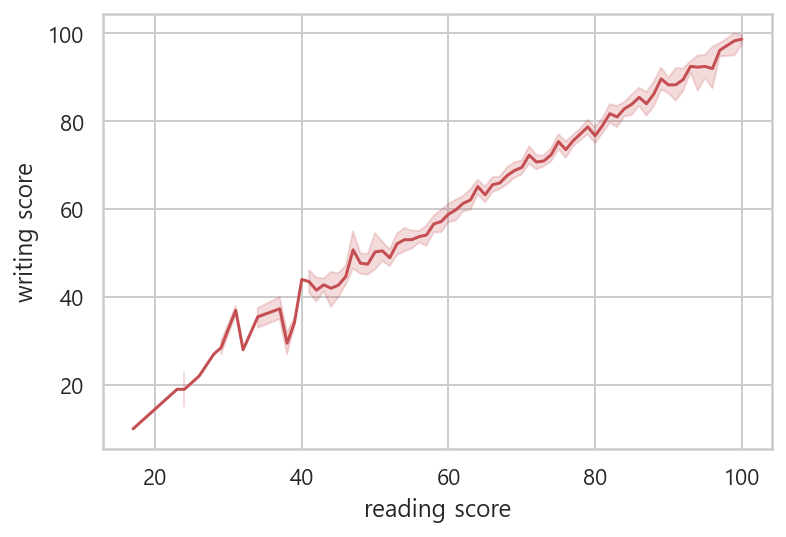

In [12]:
sns.lineplot(data=df_parental_level, x="reading score", y="writing score", color='r')
# sns.lineplot(data=df_parental_level, x="math score", y="writing score", color = 'b')
# sns.lineplot(data=df_parental_level, x="reading score", y="math score", color = 'y')

In [13]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<AxesSubplot:xlabel='parental level of education', ylabel='count'>

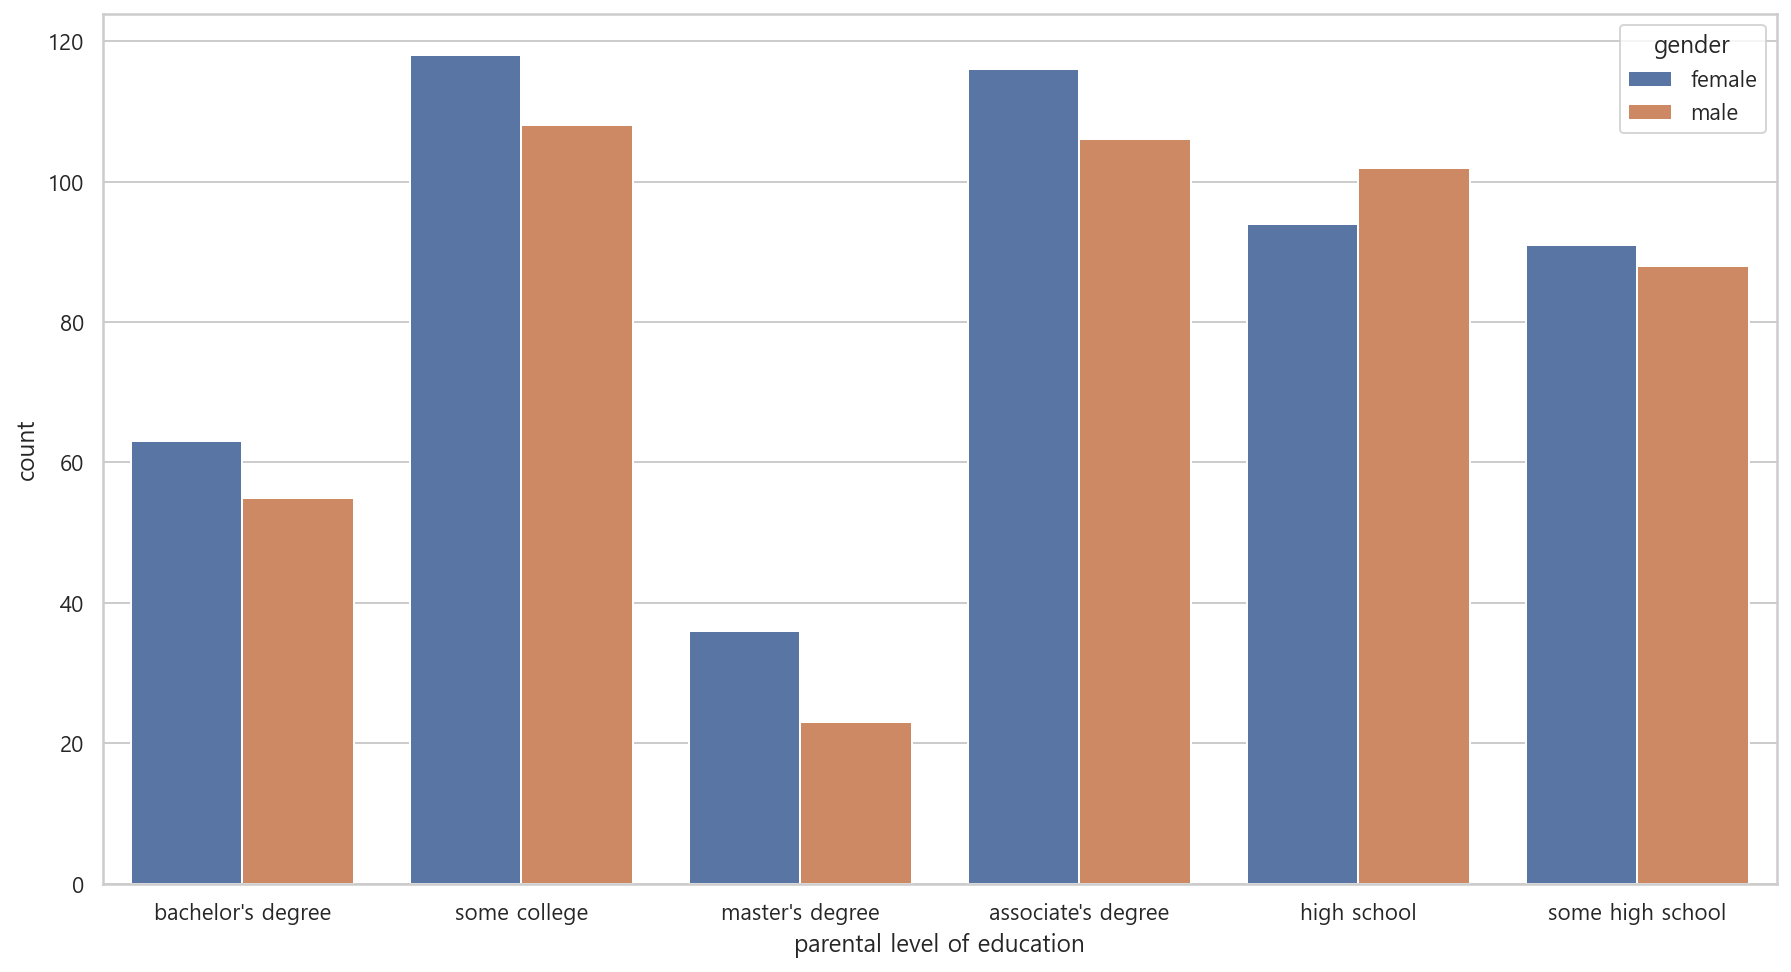

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(data=df,x="parental level of education",hue="gender")
# 대부분 남성의 비율이 더 높다.

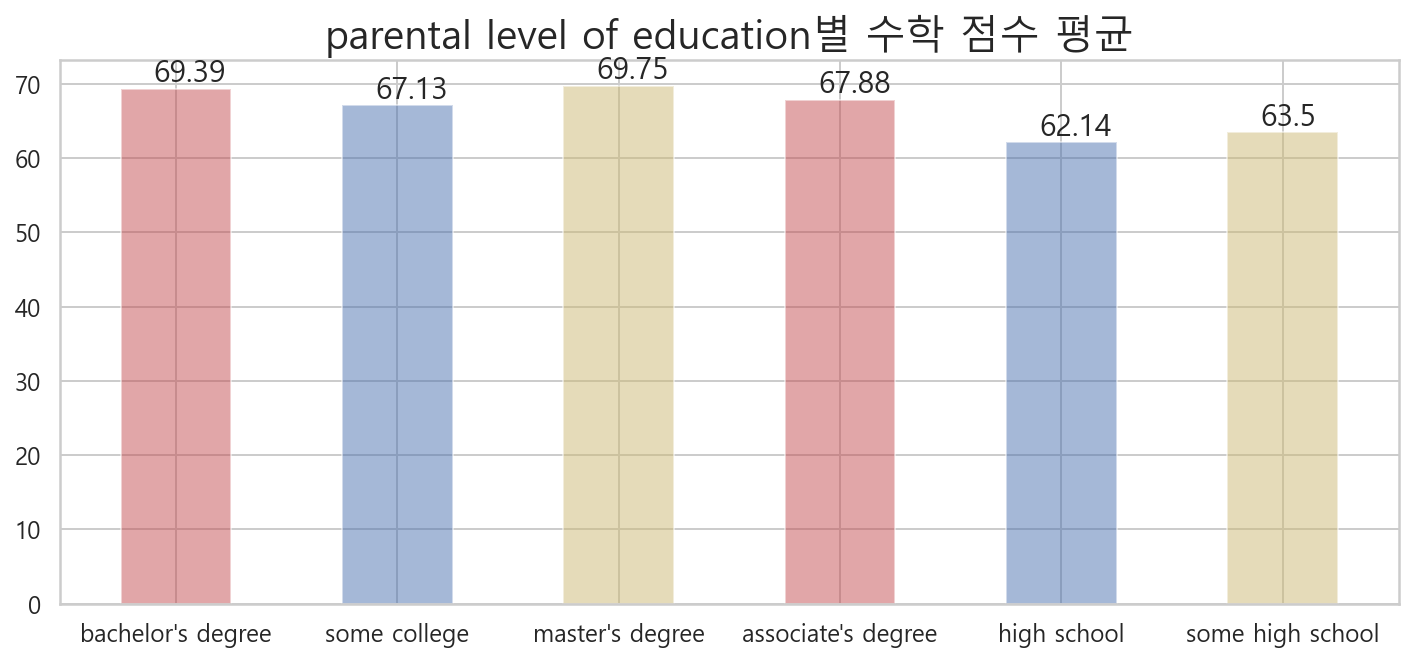

In [15]:
df_bachelor = round(df['math score'][df["parental level of education"] == "bachelor's degree"].mean(), 2)
df_some_college = round(df['math score'][df["parental level of education"] == "some college"].mean(), 2)
df_master = round(df['math score'][df["parental level of education"] == "master's degree"].mean(), 2)
df_associate = round(df['math score'][df["parental level of education"] == "associate's degree"].mean(), 2)
df_high_school = round(df['math score'][df["parental level of education"] == "high school"].mean(), 2)
df_some = round(df['math score'][df["parental level of education"] == "some high school"].mean(), 2)

x = ["bachelor's degree", "some college", "master's degree", "associate's degree", "high school", "some high school"]
y = [df_bachelor, df_some_college, df_master, df_associate, df_high_school, df_some]

plt.figure(figsize=(12,5))
plt.title("parental level of education별 수학 점수 평균", fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.bar(x, y,color = ['r', 'b', 'y'], width = 0.5, alpha = 0.5)
for index, value in enumerate(y):
    plt.text(index - 0.1, value, str(value), fontsize = 15, verticalalignment='bottom')
    # plt.text(x좌표, y좌표, text)
plt.show()

# master degree가 가장 높고, high school이 가장 낮았다.

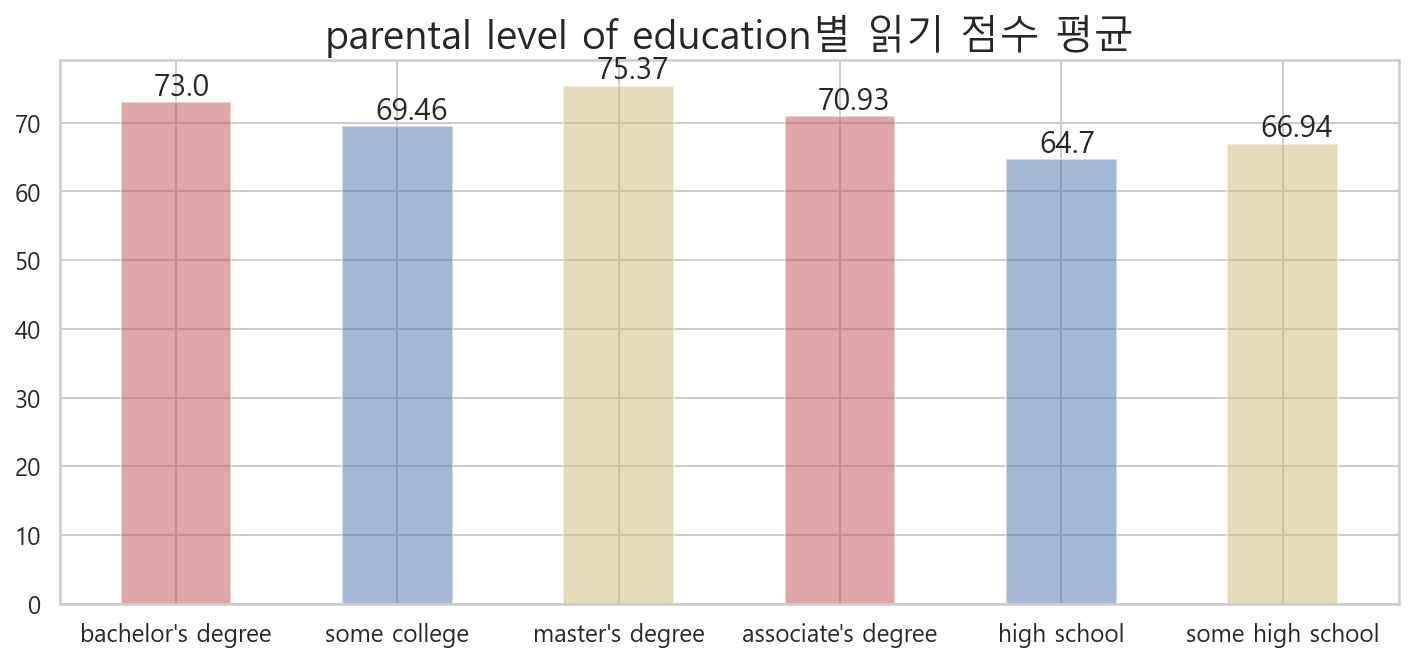

In [16]:
df_bachelor = round(df['reading score'][df["parental level of education"] == "bachelor's degree"].mean(), 2)
df_some_college = round(df['reading score'][df["parental level of education"] == "some college"].mean(), 2)
df_master = round(df['reading score'][df["parental level of education"] == "master's degree"].mean(), 2)
df_associate = round(df['reading score'][df["parental level of education"] == "associate's degree"].mean(), 2)
df_high_school = round(df['reading score'][df["parental level of education"] == "high school"].mean(), 2)
df_some = round(df['reading score'][df["parental level of education"] == "some high school"].mean(), 2)

x = ["bachelor's degree", "some college", "master's degree", "associate's degree", "high school", "some high school"]
y = [df_bachelor, df_some_college, df_master, df_associate, df_high_school, df_some]

plt.figure(figsize=(12,5))
plt.title("parental level of education별 읽기 점수 평균", fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.bar(x, y,color = ['r', 'b', 'y'], width = 0.5, alpha = 0.5)
for index, value in enumerate(y):
    plt.text(index - 0.1, value, str(value), fontsize = 15, verticalalignment='bottom')
    # plt.text(x좌표, y좌표, text)
plt.show()

# master degree가 가장 높고, high school이 가장 낮았다.

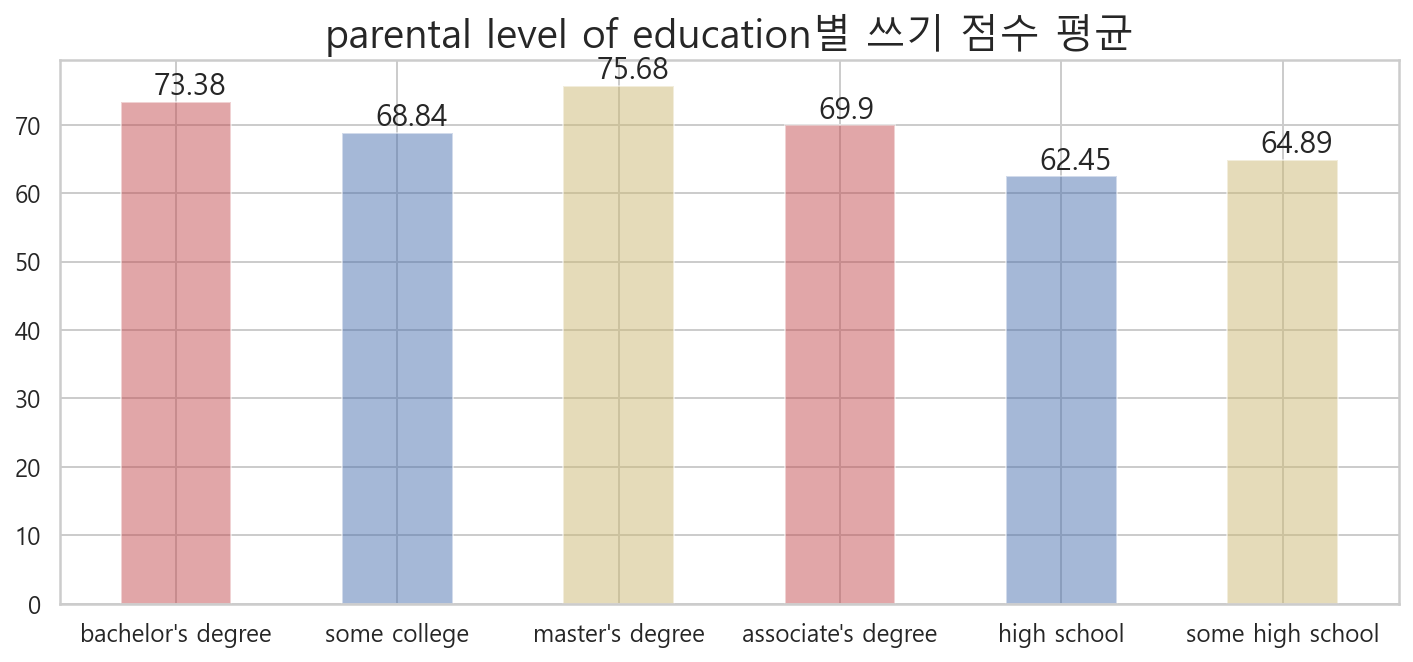

In [17]:
df_bachelor = round(df['writing score'][df["parental level of education"] == "bachelor's degree"].mean(), 2)
df_some_college = round(df['writing score'][df["parental level of education"] == "some college"].mean(), 2)
df_master = round(df['writing score'][df["parental level of education"] == "master's degree"].mean(), 2)
df_associate = round(df['writing score'][df["parental level of education"] == "associate's degree"].mean(), 2)
df_high_school = round(df['writing score'][df["parental level of education"] == "high school"].mean(), 2)
df_some = round(df['writing score'][df["parental level of education"] == "some high school"].mean(), 2)

x = ["bachelor's degree", "some college", "master's degree", "associate's degree", "high school", "some high school"]
y = [df_bachelor, df_some_college, df_master, df_associate, df_high_school, df_some]

plt.figure(figsize=(12,5))
plt.title("parental level of education별 쓰기 점수 평균", fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.bar(x, y,color = ['r', 'b', 'y'], width = 0.5, alpha = 0.5)
for index, value in enumerate(y):
    plt.text(index - 0.1, value, str(value), fontsize = 15, verticalalignment='bottom')
    # plt.text(x좌표, y좌표, text)
plt.show()

# master degree가 가장 높고, high school이 가장 낮았다.

## 위의 그래프를 보아 master's degree는 수학, 읽기, 쓰기의 평균이 가장 높았다.
## 높은 학력 순서 : master's degree(석사학위), bachelor's degree(학사 학위), associate's degree(준학사 학위), some college(대학), high school(고등학교), some high school(고등학교)
--> 학력 수준이 영향을 받는다고 할 수 있다.


<AxesSubplot:xlabel='writing score', ylabel='reading score'>

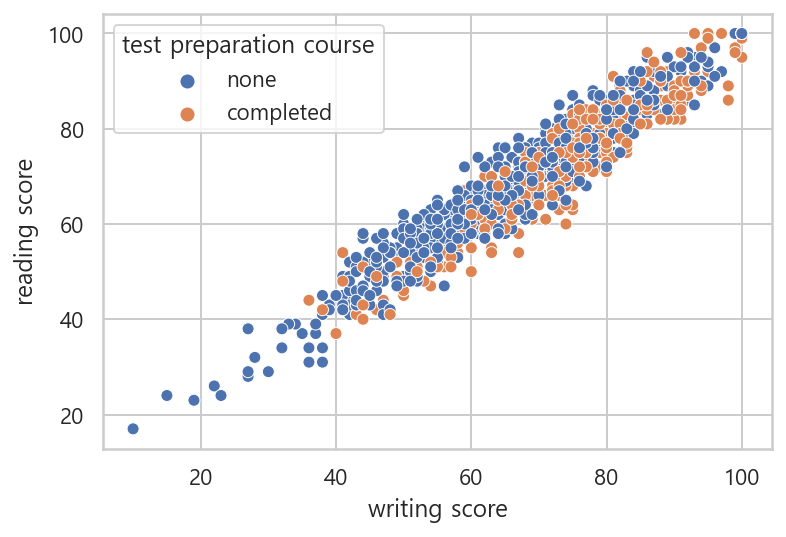

In [18]:
sns.scatterplot(data = df, x = 'writing score', y = 'reading score', hue = 'test preparation course')
# completed의 점수가 높은 쪽에 많이 있다.

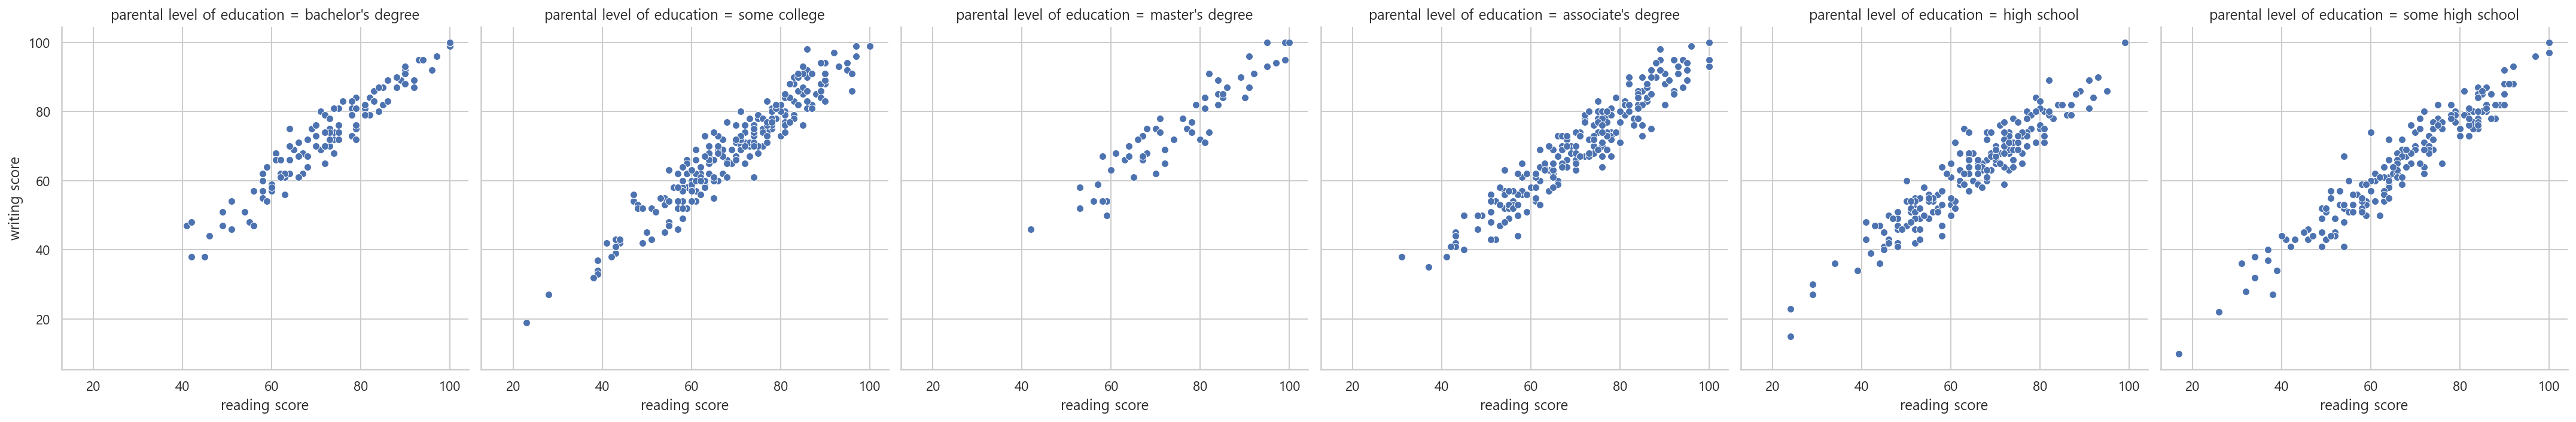

In [19]:
sns.relplot(data = df, x = 'reading score', y = 'writing score', col = 'parental level of education') # col = 컬럼을 나누는 기준

In [20]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<AxesSubplot:>

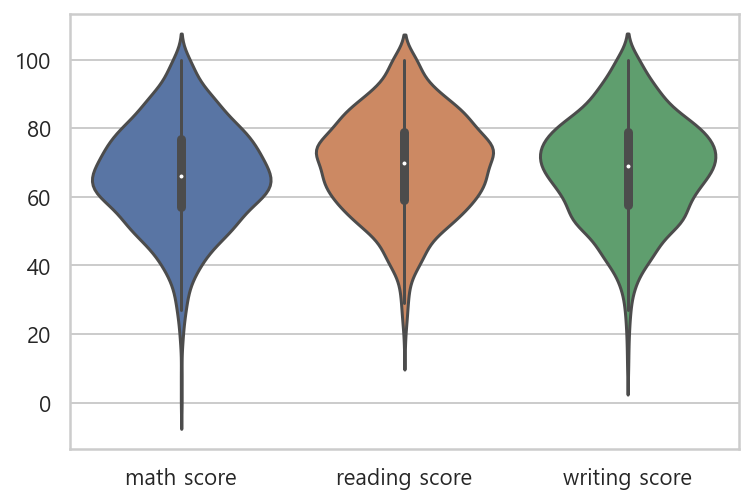

In [21]:
sns.violinplot(data = df)

In [22]:
def group(x):
    if x < 10: # 10대 미만
        return '~10'
    elif (x >= 10) & (x < 20): # 10대
        return '10점대'
    elif (x >= 20) & (x < 30): # 20대
        return '20점대'
    elif (x >= 30) & (x < 40): # 30대
        return '30점대'
    elif (x >= 40) & (x < 50): # 40대
        return '40점대'
    elif (x >= 50) & (x < 60): # 50대
        return '50점대'
    elif (x >= 60) & (x < 70): # 60대
        return '60점대'
    elif (x >= 70) & (x < 80): # 70대
        return '70점대'
    elif (x >= 80) & (x < 100): # 80대
        return '80점대'
    else: # 90대 이상
        return '90~'
    
df['math_score_2'] = df['math score'].apply(group)
df['reading_score_2'] = df['reading score'].apply(group)
df['writing_score_2'] = df['writing score'].apply(group)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_score_2,reading_score_2,writing_score_2
0,female,group B,bachelor's degree,standard,none,72,72,74,70점대,70점대,70점대
1,female,group C,some college,standard,completed,69,90,88,60점대,80점대,80점대
2,female,group B,master's degree,standard,none,90,95,93,80점대,80점대,80점대
3,male,group A,associate's degree,free/reduced,none,47,57,44,40점대,50점대,40점대
4,male,group C,some college,standard,none,76,78,75,70점대,70점대,70점대
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,80점대,80점대,80점대
996,male,group C,high school,free/reduced,none,62,55,55,60점대,50점대,50점대
997,female,group C,high school,free/reduced,completed,59,71,65,50점대,70점대,60점대
998,female,group D,some college,standard,completed,68,78,77,60점대,70점대,70점대


In [23]:
columns = ["parental level of education", "math_score_2"]
df_math = df[columns].copy()

columns = ["parental level of education", "writing_score_2"]
df_writing = df[columns].copy() 

columns = ["parental level of education", "reading_score_2"]
df_reading = df[columns].copy()

df_math = df.groupby(["parental level of education", "math_score_2"])['math score'].count()
df_reading = df.groupby(["parental level of education", "reading_score_2"])['reading score'].count()
df_writing = df.groupby(["parental level of education", "writing_score_2"])['writing score'].count()

df_math = df_math.to_frame() # 데이터 프레임으로 나타내기
df_math = df_math.reset_index() # 인덱스 리셋
df_math.columns = ['parental level of education', 'math score', 'count'] # columns 이름 변경

df_reading = df_reading.to_frame() # 데이터 프레임으로 나타내기
df_reading = df_reading.reset_index() # 인덱스 리셋
df_reading.columns = ['parental level of education', 'reading score', 'count'] # columns 이름 변경

df_writing = df_writing.to_frame() # 데이터 프레임으로 나타내기
df_writing = df_writing.reset_index() # 인덱스 리셋
df_writing.columns = ['parental level of education', 'writing score', 'count'] # columns 이름 변경
df_reading.head()

,parental level of education,reading score,count
0,associate's degree,30점대,2
1,associate's degree,40점대,11
2,associate's degree,50점대,38
3,associate's degree,60점대,45
4,associate's degree,70점대,66


#### parental level of education : bachelor's degree(학사 학위), some college(대학), master's degree(석사학위), 
#### associate's degree(준학사 학위), high school(고등학교), some high school(고등학교)

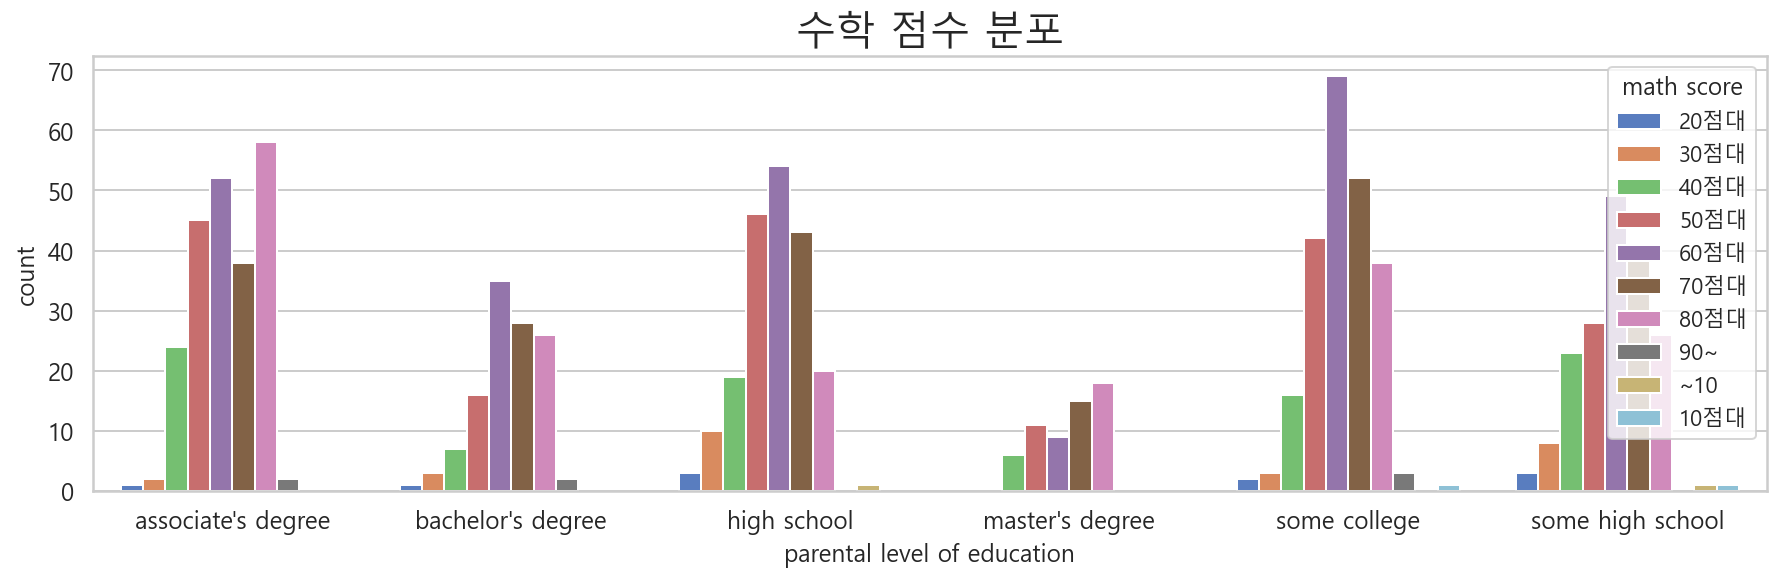

In [24]:
plt.figure(figsize=(15,4))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("수학 점수 분포", fontsize = 20)
sns.barplot(data=df_math, x="parental level of education", y="count",hue="math score", palette='muted')
plt.show()

# associate's degree는 80점대가 가장 많고, 20대가 가장 낮다. (준학사 학위 / 2년제)
# bachelor's degree는 60점대가 가장 많고, 20점대가 가장 낮다. (학사 학위 / 4년제)
# high school은 60점대가 가장 많고 ~10이하 대가 가장 낮다. (고등학교)
# master's degree는 80점대가 가장 많고, 40점대가 가장 낮다. -> 30점이하는 없다. (석사 학위 / 대학원)
# some colloge는 60점대가 가장 많고, 10점대가 가장 낮다. (특정 대학교)
# some high school은 60점대가 가장 많고, 10점 이하 대가 가장 낮다. (특정 고등학교)


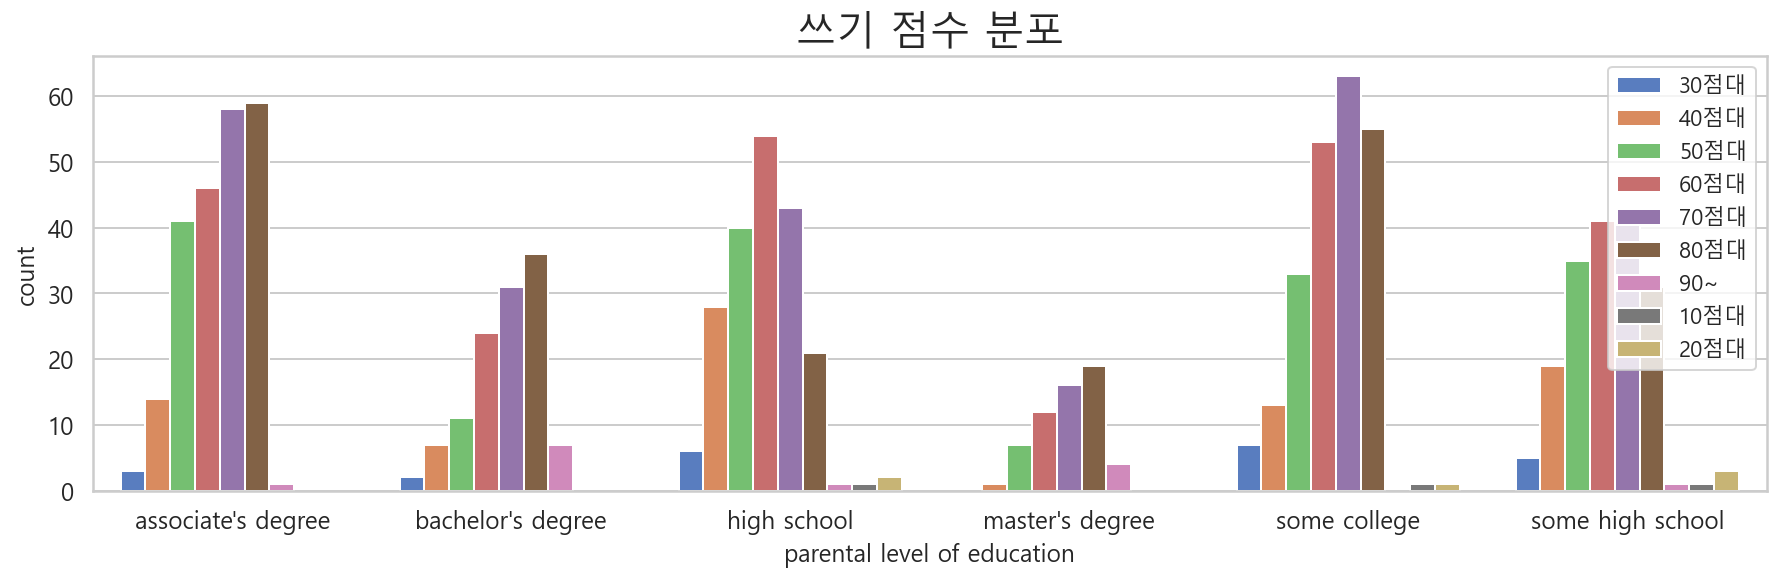

In [25]:
plt.figure(figsize=(15,4))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("쓰기 점수 분포", fontsize = 20)
sns.barplot(data=df_writing, x="parental level of education", y="count", hue="writing score", palette='muted')
plt.legend(loc = 'upper right')
plt.show()

# associate's degree는 80점대가 가장 많고, 90~이 가장 낮다. (준학사 학위)
# bachelor's degree는 80점대가 가장 많고, 30점대가 가장 낮다. (학사 학위)
# high school은 60점대가 가장 많고 90이상, 10이하 대가 가장 낮다. (고등학교)
# master's degree는 80점대가 가장 많고, 40점대가 가장 낮다. -> 30점이하는 없다. (석사 학위)
# some colloge는 70점대가 가장 많고, 10점, 20점 대가 가장 낮다. (특정 대학교)
# some high school은 70점대가 가장 많고, 10점, 90~ 대가 가장 낮다. (특정 고등학교)


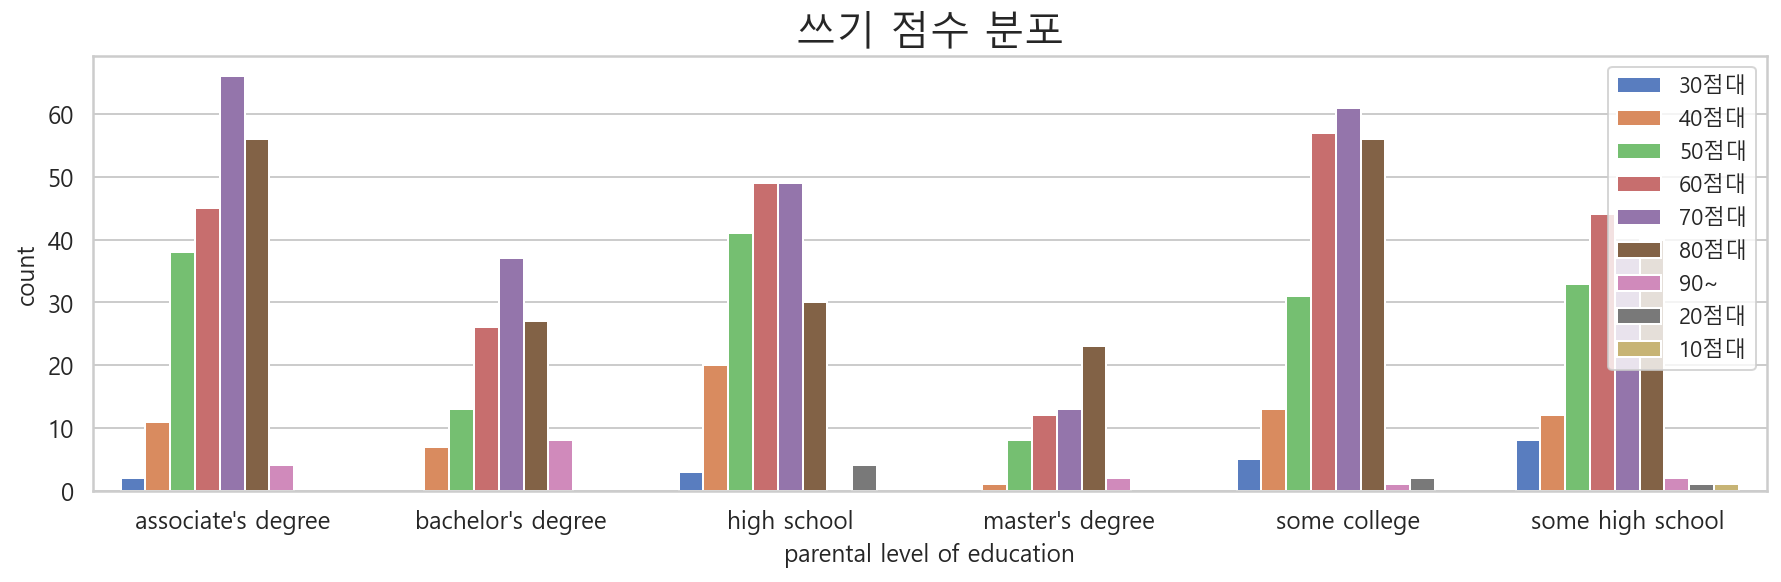

In [26]:
plt.figure(figsize=(15,4))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("쓰기 점수 분포", fontsize = 20)
sns.barplot(data=df_reading, x="parental level of education", y="count", hue="reading score", palette='muted')
plt.legend(loc = 'upper right')
plt.show()

# associate's degree는 70점대가 가장 많고, 30점대가 가장 낮다. (준학사 학위)
# bachelor's degree는 70점대가 가장 많고, 40점대가 가장 낮다. (학사 학위)
# high school은 60점, 70점 대가 가장 많고 30점대가 가장 낮다. (고등학교)
# master's degree는 80점대가 가장 많고, 40점대가 가장 낮다. -> 30점이하는 없다. (석사 학위)
# some colloge는 70점대가 가장 많고, 90~ 대가 가장 낮다. (특정 대학교)
# some high school은 60점대가 가장 많고, 10점, 20점 대가 가장 낮다. (특정 고등학교)


In [27]:
df_bachelor = df[['math score', 'writing score', 'reading score']][df["parental level of education"] == "bachelor's degree"]
df_some_college = df[['math score', 'writing score', 'reading score']][df["parental level of education"] == "some college"]
df_master = df[['math score', 'writing score', 'reading score']][df["parental level of education"] == "master's degree"]
df_associate = df[['math score', 'writing score', 'reading score']][df["parental level of education"] == "associate's degree"]
df_high_school = df[['math score', 'writing score', 'reading score']][df["parental level of education"] == "high school"]
df_some = df[['math score', 'writing score', 'reading score']][df["parental level of education"] == "some high school"]
df_bachelor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 993
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   math score     118 non-null    int64
 1   writing score  118 non-null    int64
 2   reading score  118 non-null    int64
dtypes: int64(3)
memory usage: 3.7 KB


In [28]:
# 80 이상 : A
# 80이하 70이상 : B
# 70이하 60이상 : C
# 60이하 50이상 : D
# 50이하 40이상 : E
# 40이하 : F
def group(x):
    if x > 80:
        return 'A'
    elif (x >= 70) & (x < 80):
        return 'B'
    elif (x >= 60) & (x < 70):
        return 'C'
    elif (x >= 50) & (x < 60):
        return 'D'
    elif (x >= 40) & (x < 50):
        return 'E'
    elif (x < 40):
        return 'F'
    
df['grade_math'] = df['math score'].apply(group)
df['grade_reading'] = df['reading score'].apply(group)
df['grade_writing'] = df['writing score'].apply(group)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_score_2,reading_score_2,writing_score_2,grade_math,grade_reading,grade_writing
0,female,group B,bachelor's degree,standard,none,72,72,74,70점대,70점대,70점대,B,B,B
1,female,group C,some college,standard,completed,69,90,88,60점대,80점대,80점대,C,A,A
2,female,group B,master's degree,standard,none,90,95,93,80점대,80점대,80점대,A,A,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,40점대,50점대,40점대,E,D,E
4,male,group C,some college,standard,none,76,78,75,70점대,70점대,70점대,B,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,80점대,80점대,80점대,A,A,A
996,male,group C,high school,free/reduced,none,62,55,55,60점대,50점대,50점대,C,D,D
997,female,group C,high school,free/reduced,completed,59,71,65,50점대,70점대,60점대,D,B,C
998,female,group D,some college,standard,completed,68,78,77,60점대,70점대,70점대,C,B,B


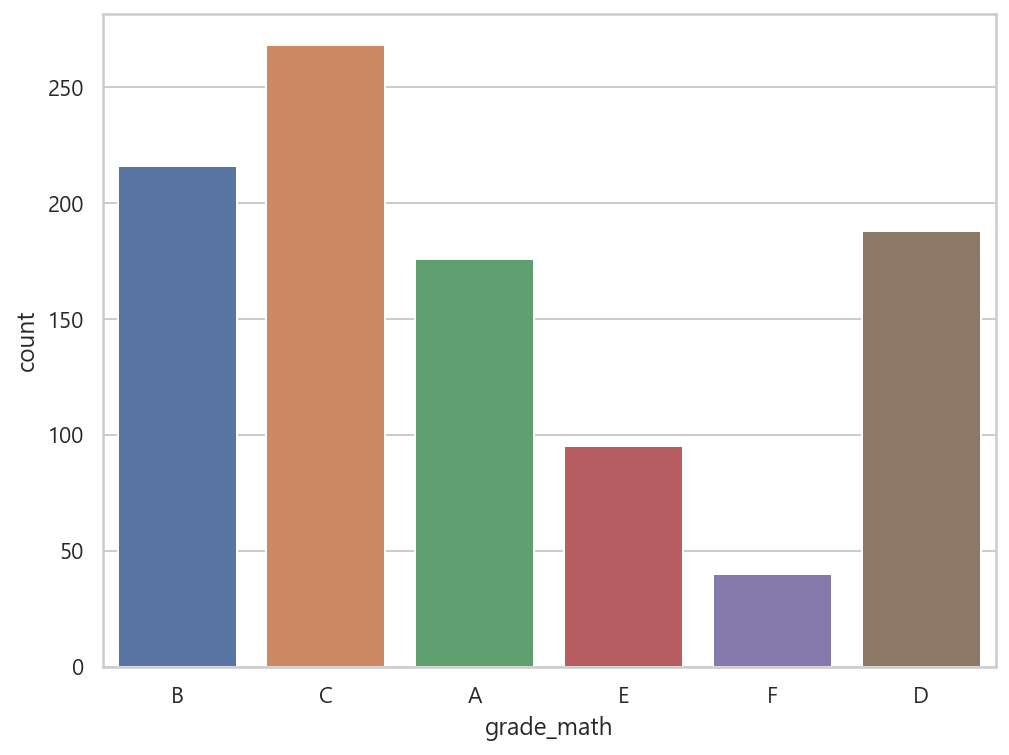

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="grade_math")
plt.show()

# 수학점수는 C가 가장 많다.

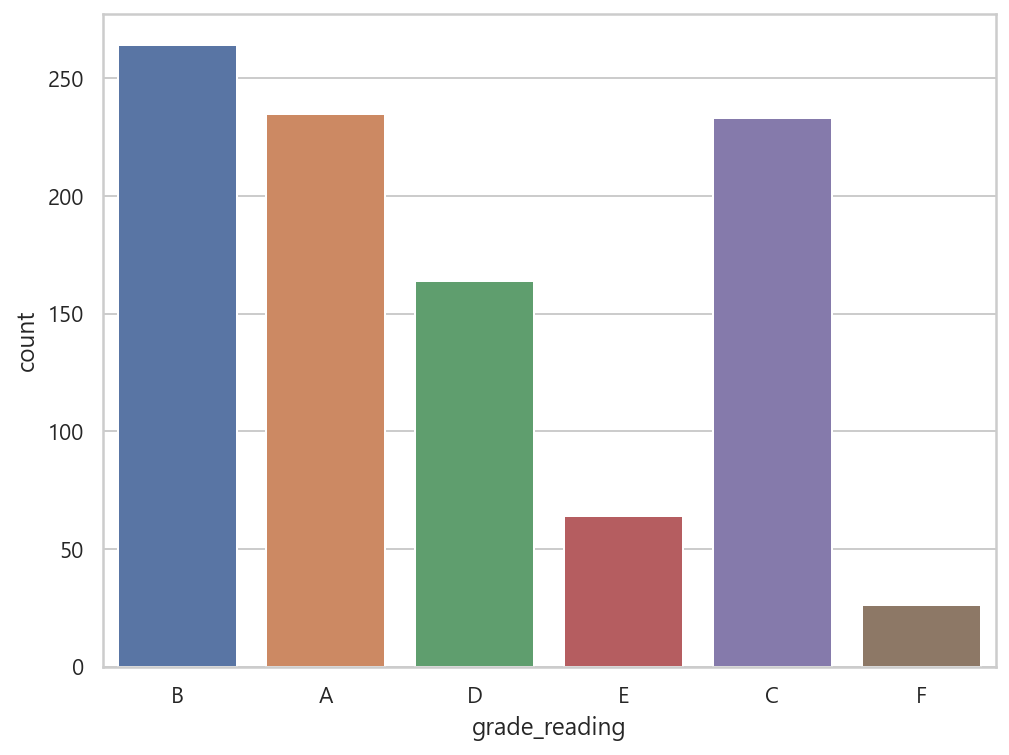

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="grade_reading")
plt.show()

# 읽기 점수는 B가 가장 많다.

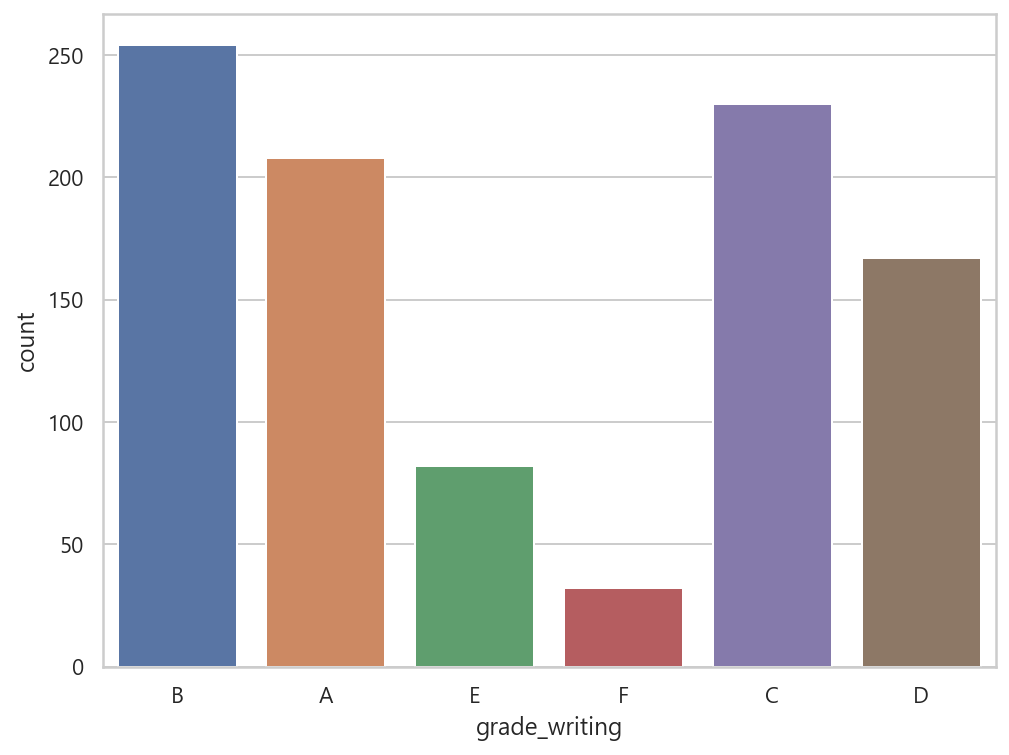

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="grade_writing")
plt.show()

# 쓰기 점수는 B가 가장 많다.